In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [343]:
train=pd.read_csv('Train_Data.csv')
test=pd.read_csv('Test_Data.csv')
test.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0


In [4]:
print(train.shape)
train.head(10)

(4571, 9)


,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71
5,01-08-2020,campaign 1,adgroup 2,ad 2,7,2,0.04,0,0.00
6,01-08-2020,campaign 1,adgroup 4,ad 2,6,3,0.05,0,0.00
7,01-08-2020,campaign 1,adgroup 1,ad 3,129,52,0.58,0,0.00
8,01-08-2020,campaign 1,adgroup 3,ad 3,104,56,0.56,0,0.00
9,01-08-2020,campaign 1,adgroup 4,ad 3,6,5,0.05,0,0.00


In [344]:

trainadgroup=pd.get_dummies(train.adgroup)
testadgroup=pd.get_dummies(test.adgroup)
train=pd.concat([train, trainadgroup], axis=1)
test=pd.concat([test, testadgroup], axis=1)
train=train.drop(['campaign', 'adgroup'], axis=1)
test=test.drop(['campaign', 'adgroup'], axis=1)
train['ad']=train.ad.str.replace('ad ', ' ')
test['ad']=test.ad.str.replace('ad ', ' ')
train['date']=np.array(pd.to_datetime(train['date'], dayfirst=True))
test['date']=np.array(pd.to_datetime(test['date'], dayfirst=True))
test['ad']=pd.to_numeric(test['ad'])
train['ad']=pd.to_numeric(train['ad'])

In [259]:
train.describe()

,ad,impressions,clicks,cost,conversions,revenue,adgroup 1,adgroup 2,adgroup 3,adgroup 4
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,15.766572,92.635747,43.340844,2.800834,1.339094,231.865340,0.287464,0.159046,0.365784,0.187705
std,19.324206,198.349737,100.164913,14.361618,5.223922,1091.742763,0.452629,0.365759,0.481702,0.390519
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,6.000000,2.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,16.000000,7.000000,0.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29.500000,84.000000,38.000000,1.350000,1.000000,92.600000,1.000000,0.000000,1.000000,0.000000
max,70.000000,3239.000000,1771.000000,531.250000,94.000000,20515.410000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='impressions', ylabel='Density'>

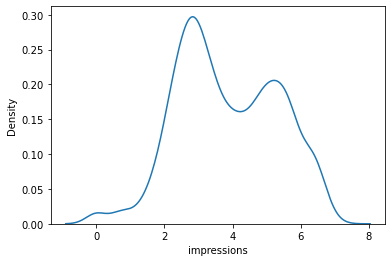

In [486]:
sns.kdeplot(np.log(X_train['impressions']))

<AxesSubplot:xlabel='clicks', ylabel='Density'>

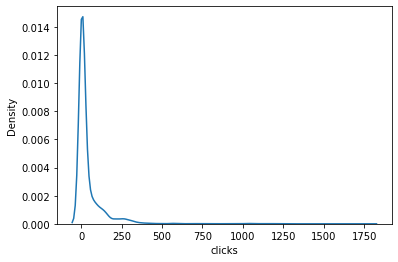

In [490]:
sns.kdeplot((train['clicks']))

<AxesSubplot:xlabel='conversions', ylabel='Density'>

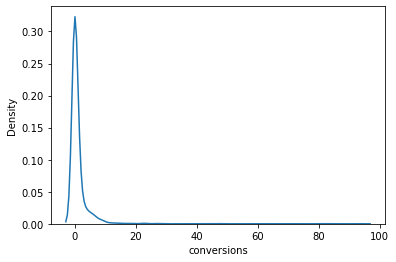

In [491]:
sns.kdeplot((train['conversions']))

In [197]:
y_train.describe()

count     4571.000000
mean       231.865340
std       1091.742763
min          0.000000
25%          0.000000
50%          0.000000
75%         92.600000
max      20515.410000
Name: revenue, dtype: float64

In [345]:
train2=train
test2=test
column_names=['date', 'ad', 'impressions', 'clicks', 'cost', 'conversions', 'adgroup 1', 'adgroup 2', 'adgroup 3', 'adgroup 4']
test2=test2.reindex(columns=column_names)
train2.head()

,date,ad,impressions,clicks,cost,conversions,revenue,adgroup 1,adgroup 2,adgroup 3,adgroup 4
0,2020-08-01,1,24,6,0.08,0,0.00,1,0,0,0
1,2020-08-01,1,1,0,0.00,0,0.00,0,1,0,0
2,2020-08-01,1,13,4,0.04,0,0.00,0,0,1,0
3,2020-08-01,1,5,4,0.08,0,0.00,0,0,0,1
4,2020-08-01,2,247,126,1.29,4,925.71,1,0,0,0


In [346]:

col=['impressions', 'clicks', 'cost', 'conversions']
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, PowerTransformer
#rs=RobustScaler()
#trainscaled=pd.DataFrame(rs.fit_transform(train2[col]), columns= col)
#testscaled=pd.DataFrame(rs.transform(test2[col]), columns= col)
#mms=MinMaxScaler()
#trainscaled=pd.DataFrame(mms.fit_transform(train2[col]), columns= col)
#testscaled=pd.DataFrame(mms.transform(test2[col]), columns= col)
pt=PowerTransformer()
trainscaled=pd.DataFrame(pt.fit_transform(train2[col]), columns= col)
testscaled=pd.DataFrame(pt.transform(test2[col]), columns= col)
#ss=StandardScaler()
#trainscaled=pd.DataFrame(ss.fit_transform(train2[col]), columns= col)
#testscaled=pd.DataFrame(ss.transform(test2[col]), columns= col)

In [347]:
col_added_train=['date', 'ad', 'revenue', 'adgroup 1', 'adgroup 2', 'adgroup 3', 'adgroup 4']
col_added_test=['date', 'ad', 'adgroup 1', 'adgroup 2', 'adgroup 3', 'adgroup 4']
trainscaled[col_added_train]=train2[col_added_train]
testscaled[col_added_test]=test2[col_added_test]
trainscaled.head()

,impressions,clicks,cost,conversions,date,ad,revenue,adgroup 1,adgroup 2,adgroup 3,adgroup 4
0,0.165523,-0.180342,-0.776415,-0.643494,2020-08-01,1,0.00,1,0,0,0
1,-1.670261,-1.691606,-1.046039,-0.643494,2020-08-01,1,0.00,0,1,0,0
2,-0.201101,-0.411930,-0.905467,-0.643494,2020-08-01,1,0.00,0,0,1,0
3,-0.792581,-0.411930,-0.776415,-0.643494,2020-08-01,1,0.00,0,0,0,1
4,1.359614,1.406463,0.866418,1.756795,2020-08-01,2,925.71,1,0,0,0


In [226]:
testscaled.head()

,impressions,clicks,cost,conversions,date,ad,adgroup 1,adgroup 2,adgroup 3,adgroup 4
0,1.030003,0.967297,0.240201,1.218397,2021-03-01,1,1,0,0,0
1,0.114592,0.217113,-0.521639,-0.643494,2021-03-01,1,0,0,1,0
2,-0.792581,-0.571911,-0.872179,-0.643494,2021-03-01,1,0,0,0,1
3,-1.330719,-1.103449,-1.009735,-0.643494,2021-03-01,1,0,1,0,0
4,-1.101095,-1.103449,-1.009735,-0.643494,2021-03-01,2,0,1,0,0


In [348]:
dw_mapping={
    0: 0, 
    1: 0, 
    2: 0, 
    3: 0, 
    4: 0,
    5: 1, 
    6: 1
} 
trainscaled['is_weekend']=trainscaled['date'].dt.weekday.map(dw_mapping)
testscaled['is_weekend']=testscaled['date'].dt.weekday.map(dw_mapping)
#trainscaled['is_weekend']= 1 if trainscaled['day_of_week']= 5 or 6
trainscaled.head()

,impressions,clicks,cost,conversions,date,ad,revenue,adgroup 1,adgroup 2,adgroup 3,adgroup 4,is_weekend
0,0.165523,-0.180342,-0.776415,-0.643494,2020-08-01,1,0.00,1,0,0,0,1
1,-1.670261,-1.691606,-1.046039,-0.643494,2020-08-01,1,0.00,0,1,0,0,1
2,-0.201101,-0.411930,-0.905467,-0.643494,2020-08-01,1,0.00,0,0,1,0,1
3,-0.792581,-0.411930,-0.776415,-0.643494,2020-08-01,1,0.00,0,0,0,1,1
4,1.359614,1.406463,0.866418,1.756795,2020-08-01,2,925.71,1,0,0,0,1


In [228]:
testscaled.head()

,impressions,clicks,cost,conversions,date,ad,adgroup 1,adgroup 2,adgroup 3,adgroup 4,is_weekend
0,1.030003,0.967297,0.240201,1.218397,2021-03-01,1,1,0,0,0,0
1,0.114592,0.217113,-0.521639,-0.643494,2021-03-01,1,0,0,1,0,0
2,-0.792581,-0.571911,-0.872179,-0.643494,2021-03-01,1,0,0,0,1,0
3,-1.330719,-1.103449,-1.009735,-0.643494,2021-03-01,1,0,1,0,0,0
4,-1.101095,-1.103449,-1.009735,-0.643494,2021-03-01,2,0,1,0,0,0


In [349]:
trainscaled=trainscaled.drop('date', axis=1)
testscaled=testscaled.drop('date', axis=1)
trainscaled=trainscaled.drop('adgroup 4', axis=1)
testscaled=testscaled.drop('adgroup 4', axis=1)
#trainscaled=trainscaled.drop('ad', axis=1)
#testscaled=testscaled.drop('ad', axis=1)

In [350]:
Q1 = trainscaled.quantile(0.15)
Q3 = trainscaled.quantile(0.85)
IQR = Q3 - Q1
x_scaled = trainscaled[~((trainscaled < (Q1 -65.0 * IQR)) |(trainscaled > (Q3 + 65.0 * IQR))).any(axis=1)] # 34 optimal with xgb
print("SHAPE:",x_scaled.shape)#4569 with minmaxscaler and xgb. and 4568 with powerscaler

SHAPE: (4569, 10)


In [252]:
#zz=x_scaled['revenue'].groupby(xscaled.ad)
#fig = plt.figure(figsize =(10,5 ))
#plt.bar(zz['ad'], zz['revenue'])

In [351]:
xscaled=x_scaled.drop('revenue', axis=1)
y=x_scaled.revenue
xscaled.shape, y.shape

((4569, 9), (4569,))

In [254]:
y.head()

0      0.00
1      0.00
2      0.00
3      0.00
4    925.71
Name: revenue, dtype: float64

In [363]:
xscaled.head()

,impressions,clicks,cost,conversions,ad,adgroup 1,adgroup 2,adgroup 3,is_weekend,rel
0,0.165523,-0.180342,-0.776415,-0.643494,1,1,0,0,1,-1.089531
1,-1.670261,-1.691606,-1.046039,-0.643494,1,0,1,0,1,1.012779
2,-0.201101,-0.411930,-0.905467,-0.643494,1,0,0,1,1,2.048376
3,-0.792581,-0.411930,-0.776415,-0.643494,1,0,0,0,1,0.519732
4,1.359614,1.406463,0.866418,1.756795,2,1,0,0,1,1.034458


In [256]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import keras
from keras.models import Sequential
from keras.layers import Dense


In [141]:
model = Sequential()
model.add(Dense(4569, input_dim=9, activation= "sigmoid"))
model.add(Dense(100, activation= "sigmoid"))
model.add(Dense(50, activation= "sigmoid"))
model.add(Dense(1))

In [143]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(X_train, y_train, epochs=25)

Epoch 1/25
92/92 [==============================] - 1s 7ms/step - loss: 192203.0938 - mean_squared_error: 192203.0938
Epoch 2/25
92/92 [==============================] - 1s 8ms/step - loss: 191259.8125 - mean_squared_error: 191259.8125
Epoch 3/25
92/92 [==============================] - 1s 8ms/step - loss: 190135.3906 - mean_squared_error: 190135.3906
Epoch 4/25
92/92 [==============================] - 1s 8ms/step - loss: 188122.5938 - mean_squared_error: 188122.5938
Epoch 5/25
92/92 [==============================] - 1s 8ms/step - loss: 184320.4844 - mean_squared_error: 184320.4844
Epoch 6/25
92/92 [==============================] - 1s 7ms/step - loss: 182599.9688 - mean_squared_error: 182599.9688
Epoch 7/25
92/92 [==============================] - 1s 8ms/step - loss: 181827.1406 - mean_squared_error: 181827.1406
Epoch 8/25
92/92 [==============================] - 1s 8ms/step - loss: 179895.1250 - mean_squared_error: 179895.1250
Epoch 9/25
92/92 [==============================] - 1s 8

In [145]:
target=model.predict(testscaled)
print(mean_squared_error(model.predict(xscaled), y))

1127435.2736203081


In [1021]:
lr=LinearRegression()
lr.fit(xscaled, y)
print(mean_squared_error(lr.predict(xscaled), y)
target=lr.predict(testscaled)

2097.836822496166


In [671]:
dtr=DecisionTreeRegressor(min_samples_split=20)
dtr.fit(xscaled, y)
print(mean_squared_error(dtr.predict(xscaled), y))
target=dtr.predict(testscaled)

55922.39056630332


In [57]:
rfr=RandomForestRegressor(n_estimators=1000, min_samples_split=10, n_jobs=8)
rfr.fit(xscaled, y)
print(mean_squared_error(rfr.predict(xscaled), y))
target2=rfr.predict(testscaled)

<ipython-input-57-29e1a92f674e>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xscaled, y)


0.0027530772347602954


In [354]:
xgb=XGBRegressor(n_estimators=1000, learning_rate=0.038, n_jobs=8, early_stopping_rounds=7,max_depth=3)
xgb.fit(xscaled, y)
print(mean_squared_error(xgb.predict(xscaled), y))
target=xgb.predict(testscaled)

[19:00:09] WARNING: ..\src\learner.cc:541: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


8248.846441110283


In [1180]:
importance = xgb.feature_importances_
importance

array([8.6237472e-03, 4.2245644e-03, 4.8764320e-03, 9.3301076e-01,
       3.0791754e-02, 1.0124521e-02, 2.8049983e-03, 5.2149262e-04,
       5.0217845e-03], dtype=float32)

In [1]:
res = pd.DataFrame(target)
res.index = testscaled.index 
res.columns = ["revenue"]
res.to_csv("prediction_results.csv", index = False)

NameError: name 'pd' is not defined